In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

train_data = pd.read_parquet("/content/drive/MyDrive/TP2 - ORGANIZACIÓN DE DATOS/dataset_v2/train.parq", engine="pyarrow")


Mounted at /content/drive


## Distribución porcentual de Tipos de Ataque por País (Top 20 Países) con Label 1

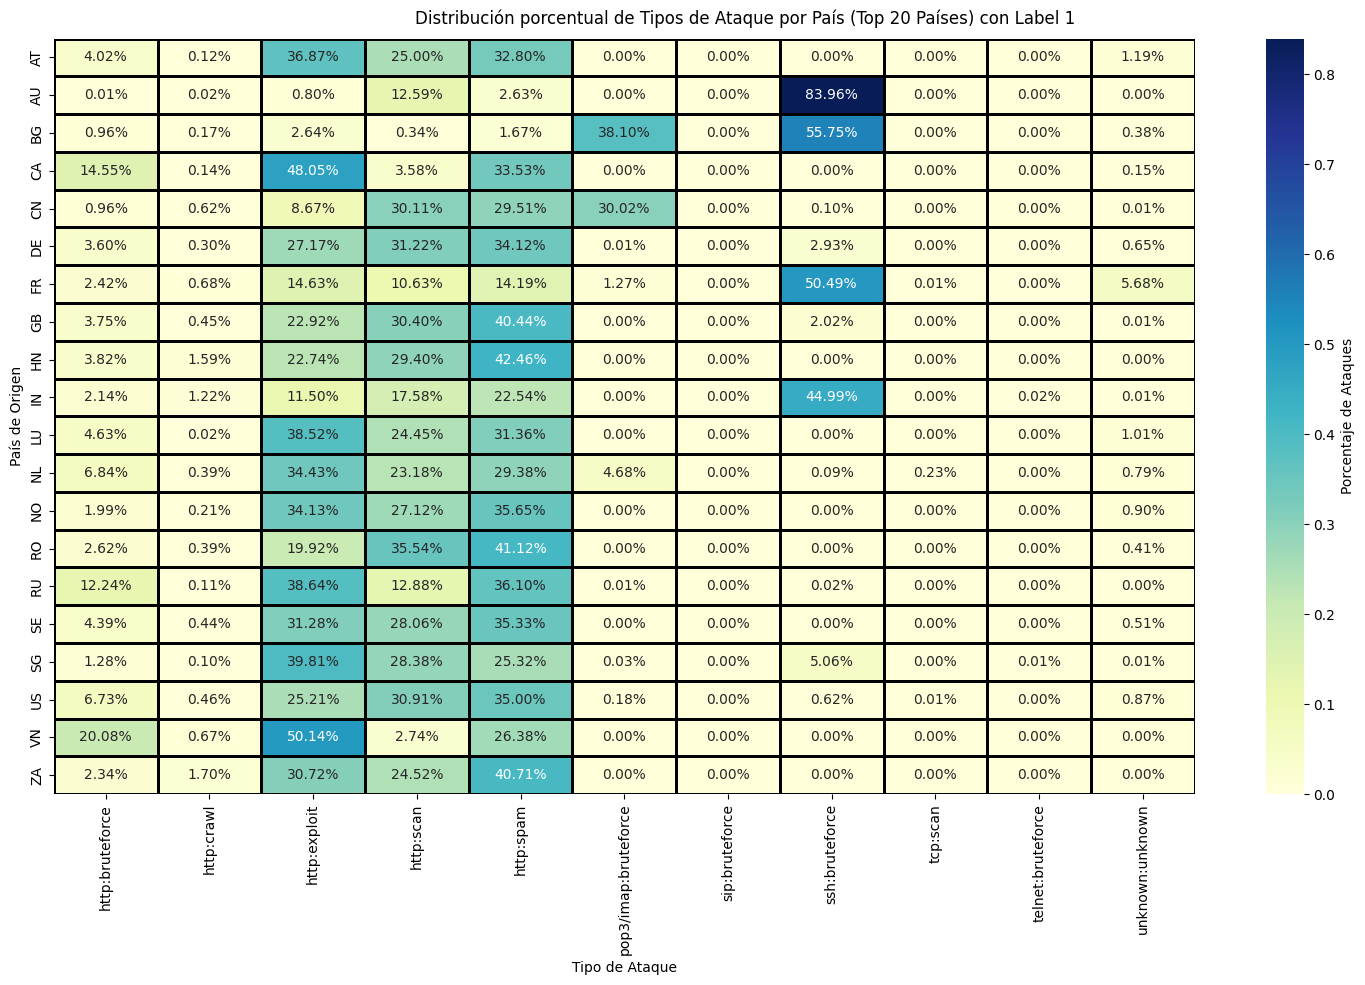

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



top_20_countries_label_1 = train_data[train_data['label'] == 1]['attacker_country'].value_counts().head(20).index.tolist()


fig, axes = plt.subplots(1, 1, figsize=(15, 10), sharey=True)


filtered_data_label_1 = train_data[(train_data['label'] == 1) & (train_data['attacker_country'].isin(top_20_countries_label_1))]
pivot_table_label_1 = pd.crosstab(index=filtered_data_label_1['attacker_country'], columns=filtered_data_label_1['attack_type'], normalize='index')


sns.heatmap(pivot_table_label_1, cmap='YlGnBu', annot=True, fmt=".2%", linewidths=1, linecolor='black', ax=axes, cbar_kws={'label': 'Porcentaje de Ataques'})
axes.set_xlabel("Tipo de Ataque")
axes.set_ylabel("País de Origen")

plt.suptitle("Distribución porcentual de Tipos de Ataque por País (Top 20 Países) con Label 1")
plt.tight_layout()
plt.show()
